# Deep Neural Network for News Classification: Application

You will use use the functions you'd implemented in the previous assignment to build a deep network, and apply it to politics-society news classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation.  

**After this assignment you will be able to:**
- Build and apply a deep neural network to supervised learning. 

Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Dataset

You will use the same dataset as in "Logistic Regression as a Neural Network". The model you had built had 84% test accuracy on classifying politics-society vs others news. Hopefully, your new model will perform a better!

In [12]:
df = pd.read_csv('news_dataset.csv')

In [13]:
df.head()

text          label
0   Nhân tài… đến rồi đi Trong cuộc khảo sát nhan...  Chinhtrixahoi
1  Tử hình Lâm Bích Thủy và Toàn '6 Ngón'  \n Hôm...           Khac
2   Dùng ống chích tống tiền 1 tỉ đồng Tối 19-12,...           Khac
3  Mekong Capital tăng đầu tư vào VN \n Ông Chris...           Khac
4  Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đo...  Chinhtrixahoi

In [14]:
size_politics_society = df[df['label'] == 'Chinhtrixahoi'].shape[0]
size_others = df[df['label'] == 'Khac'].shape[0]
print('Number of politics-society documents: %s' %size_politics_society)
print('Number of other documents: %s' %size_others)

Number of politics-society documents: 200
Number of other documents: 200


In [15]:
# an example of a politics-society news
df['text'][4]

"Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đoàn tàu D2 từ Sài Gòn ra Đà Nẵng đã húc phải một xe tải Kamaz tại Km 1264 trên đường sắt thuộc huyện Vạn Ninh, tỉnh Khánh Hòa. Xe tải hư hại nặng, đầu máy xe lửa trật đường ray. Tai nạn xảy ra vào 22h30' ngày 1/7 khiến nhiều đoàn tàu bị đình trệ. \n Đến 7h30 ngày 2/7, giao thông trên đường sắt xuyên Việt mới trở lại bình thường. \n Theo ông Nguyễn Đình Tân, Giám đốc Xí nghiệp vận tải đường sắt Phú Khánh, nguyên nhân tai nạn do xe tải chở vật liệu nặng băng qua đường sắt nhưng không vượt qua được và nằm chắn ngang trên đường ray. Tài xế xe tải đã bỏ trốn. \n Tại ga Đà Nẵng, lúc 10h ngày 2/7 nhà ga mới thông báo về sự kiện này khiến hơn 500 hành khách đi trên 7 chuyến tàu E, S đã mua vé từ Đà Nẵng đi ra phía bắc rất bực mình vì phải đợi tàu nhiều giờ, nhất là hàng trăm thí sinh cùng người nhà đi thi đại học tại Vinh và Hà Nội. \n  \n "

In [16]:
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['text'], df['label'])

# label encode the target variable, encode labels to 0 or 1
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
print('["Chinhtrixahoi" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Khac"]))

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels


#### TF-IDF Vectors as features

In [17]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [18]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 300
Number of testing documents: 100
Number of features of each document: 5721
xtrain_tfidf shape: (300, 5721)
train_y shape: (300,)
xtest_tfidf shape: (100, 5721)
test_y shape: (100,)


In [19]:
# To have matrix/vector dimensions that fit out networks
# you should now transpose the training and testing numpy-array, 
# and expand the shape of the lable arrays in the axis=0 position.train_y = np.expand_dims(train_y, axis=0)
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix 
xtrain_tfidf =  xtrain_tfidf.T.toarray() 
xtest_tfidf =  xtest_tfidf.T.toarray()
### END CODE HERE ###

In [20]:
# New shape 
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5721, 300)
train_y shape: (1, 300)
xtest_tfidf shape: (5721, 100)
test_y shape: (1, 100)


## 3 - Architecture of your model

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish politics-society news from other news.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 3.1 - 2-layer neural network
#### An analogy between images and news classifcation

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

### 3.2 - L-layer deep neural network
#### An analogy between images and news classifcation

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [21]:
### CONSTANTS DEFINING THE MODEL ####
n_x = xtrain_tfidf.shape[0]
n_h = 10
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [22]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 2000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1,activation='relu') 
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing.

Cost after iteration 0: 0.693138262177193
Cost after iteration 100: 0.6931102237424739
Cost after iteration 200: 0.6930528863437142
Cost after iteration 300: 0.6929226878155934
Cost after iteration 400: 0.6926253223390639
Cost after iteration 500: 0.6919349238905312
Cost after iteration 600: 0.6903346157603233
Cost after iteration 700: 0.6866613506341507
Cost after iteration 800: 0.6784099967192512
Cost after iteration 900: 0.6606748206920936
Cost after iteration 1000: 0.6255811222929637
Cost after iteration 1100: 0.5649940677760077
Cost after iteration 1200: 0.4787456585450135
Cost after iteration 1300: 0.38155621915613386
Cost after iteration 1400: 0.29265872641461627
Cost after iteration 1500: 0.22187783686674997
Cost after iteration 1600: 0.16925243767763445
Cost after iteration 1700: 0.13104200567795635
Cost after iteration 1800: 0.10334376983761552
Cost after iteration 1900: 0.0830882123976483
Cost after iteration 2000: 0.0680687155652993
Cost after iteration 2100: 0.056747970346

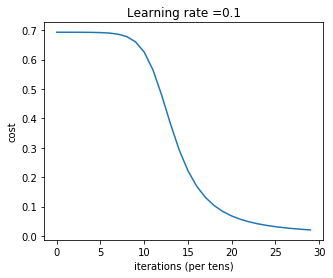

In [23]:
parameters = two_layer_model(xtrain_tfidf, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify news from the dataset. To see your predictions on the training and test sets, run the cell below.

In [21]:
predictions_train = predict(xtrain_tfidf, train_y, parameters)

Accuracy: 1.0000000000000002


In [24]:
predictions_test = predict(xtest_tfidf, test_y, parameters)

Accuracy: 0.8599999999999999


**Note**: Running the model on fewer iterations may gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance than the logistic regression implementation. Let's see if you can do even better with an $L$-layer model.

## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [25]:
### CONSTANTS ###
layers_dims = [xtrain_tfidf.shape[0], 20, 7, 5, 1] #  4-layer model

In [26]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 2000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration.

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.692650
Cost after iteration 200: 0.691476
Cost after iteration 300: 0.688023
Cost after iteration 400: 0.674740
Cost after iteration 500: 0.596932
Cost after iteration 600: 0.337055
Cost after iteration 700: 0.111029
Cost after iteration 800: 0.058321
Cost after iteration 900: 0.039398
Cost after iteration 1000: 0.030012
Cost after iteration 1100: 0.023566
Cost after iteration 1200: 0.019575
Cost after iteration 1300: 0.016919
Cost after iteration 1400: 0.014626
Cost after iteration 1500: 0.012898
Cost after iteration 1600: 0.011573
Cost after iteration 1700: 0.010404
Cost after iteration 1800: 0.009491
Cost after iteration 1900: 0.008748
Cost after iteration 2000: 0.008091
Cost after iteration 2100: 0.007566
Cost after iteration 2200: 0.007038
Cost after iteration 2300: 0.006611
Cost after iteration 2400: 0.006226
Cost after iteration 2500: 0.005898
Cost after iteration 2600: 0.005583
Cost after iteration 2700: 0.005314
Cost

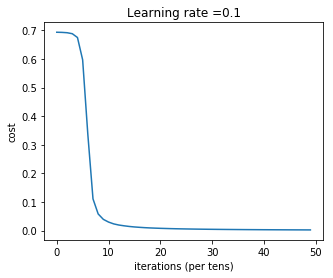

In [28]:
parameters = L_layer_model(xtrain_tfidf, train_y, layers_dims, num_iterations = 5000, print_cost = True)

In [19]:
pred_train = predict(xtrain_tfidf, train_y, parameters)

Accuracy: 1.0000000000000002


In [29]:
pred_test = predict(xtest_tfidf, test_y, parameters)

Accuracy: 0.8599999999999999


It seems that your 4-layer neural network has slightly better performance (88%) than 2-layer neural network (87%) on the same test set. The 4-layer network also needs much less iterations to converge.

This is good performance for this task. Nice job! 

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course). 

##  6) Results Analysis

First, let's take a look at some news the L-layer model labeled incorrectly. This will show a few mislabeled news. 

In [32]:
a = pred_test + test_y
mislabeled_indices = np.asarray(np.where(a == 1))

In [37]:
import re
num_news = len(mislabeled_indices[0])
for i in range(num_news):
    index = mislabeled_indices[1][i]
    true = test_y[0][index]
    pred = pred_test[0][index]
    print(encoder.inverse_transform([int(pred)]))
    #print('This is "%s" news, you predicted it is "%s" news: \n' %(encoder.inverse_transform(true), encoder.inverse_transform([int(pred)])))
    print(re.sub(r'\s{2,}', "", list(test_x[index:index+1])[0]))
    print('------------------------------------------------------------')

['Chinhtrixahoi']
67 hãng lữ hành nhận giải thưởng The Guide AwardsGiải thưởng The Guide Awards 2003 dành cho các doanh nghiệp dịch vụ du lịch tại Việt Nam sẽ được diễn ra vào tối 26/3 tại Dinh Thống Nhất (TP HCM). Đây là lần thứ 5 giải được tổ chức có số lượng doanh nghiệp đoạt giải cao nhất.Điểm nhấn của giải thưởng năm nay là bảo vệ môi trường với hai giải dành cho Furama Resort và Victoria Châu Đốc.Như mọi năm, nhóm khách sạn vẫn có nhiều giải thưởng nhất với 15 khách sạn đoạt giải. Japan Airlines, Cathay Pacific Airways và Thai Airways nhận được giải mới giành cho hãng hàng không có dịch vụ tốt nhất, dịch vụ hoàn hảo và có giá cạnh tranh nhất. Hai hãng taxi Hà Nội và TP HCM năm nay cũng được bình chọn là hãng taxi tốt nhất.Trong ngày trao giải, hội xuân chào mừng và cổ vũ cho ngành du lịch Việt Nam dự kiến sẽ thu hút khoảng 10.000 lượt công chúng tham dự. Có gần 60 gian hàng của các doanh nghiệp du lịch được triển lãm cùng với các cuộc thi dành cho đông đảo người tham dự về Kiến t

## 7) Test with your own news (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own news and see the output of your model.

["Chinhtrixahoi" "Khac"] labels corresponds to [0 1] labels

In [41]:
my_text = u"""Là người tham luận đầu tiên, Đại tướng Phạm Văn Trà (nguyên Bộ trưởng Quốc phòng) khẳng định thực chất Pol Pot đã tiến hành các hoạt động chống phá Việt Nam từ năm 1972.

"Tôi vào Quân khu 9 từ năm 1963, theo dõi kỹ nên biết tình hình này. Không phải nghiễm nhiên Pol Pot chống chúng ta mà phải có một thế lực bên ngoài đứng đằng sau mới có đủ sức", tướng Trà quả quyết.

Ông cho hay, khi đó, Việt Nam đang tập trung cho chiến tranh chống Mỹ nên "chúng ta bỏ qua, cố gắng chịu đựng, thắng Mỹ rồi mới thương lượng với họ".

Năm 1972, nhiều đội quân của Quân khu 9 sang Campuchia đã bị Pol Pot giết hại. Sư đoàn 1 được tăng cường cho quân khu này, hoạt động chủ yếu ở An Giang, Hà Tiên cũng bị Pol Pot cho phá hủy một bệnh viện của đơn vị này ở Tà Keo.

"""

my_x_tfidf =  tfidf_vect.transform([my_text]).T.toarray()

In [42]:
my_label_y = [1] # the true class of your news
my_predicted_news = predict(my_x_tfidf, my_label_y, parameters)
print ('your L-layer model predicts "%s" ' %encoder.inverse_transform([int(np.squeeze(my_predicted_news))]))

Accuracy: 0.0
your L-layer model predicts "['Chinhtrixahoi']" 


**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

## Word Embeddings

In [99]:
from pyvi import ViTokenizer
from gensim.models.word2vec import Word2Vec
from keras.preprocessing import sequence

A word embedding is a form of representing words and documents using a dense vector representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning.

Loading a pretrained word embeddings - based on Vietnam wikipedia.

The word embeddings are trained with gensim - a library for training Word2Vec.

In [101]:
word_vectors = Word2Vec.load('vi.bin').wv

We will see that this also adapt to Vietnamese language since tokenization applied to phrases rather single words.

Show some similar words based on cosine similarity

In [45]:
word_vectors.most_similar('tin_tức')

/usr/local/lib/python3.4/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('thông_tin', 0.6357953548431396),
 ('phóng_viên', 0.6156644821166992),
 ('báo_cáo', 0.6109341382980347),
 ('bình_luận', 0.6045681238174438),
 ('báo_chí', 0.6012975573539734),
 ('biên_tập_viên', 0.5868688821792603),
 ('thời_sự', 0.5609147548675537),
 ('trực_tuyến', 0.5557071566581726),
 ('phóng_sự', 0.5530218482017517),
 ('diễn_đàn', 0.5431270599365234)]

In [46]:
word_vectors.most_similar('chính_trị')

/usr/local/lib/python3.4/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dân_sự', 0.6620455980300903),
 ('quân_sự', 0.6434805989265442),
 ('cấp_tiến', 0.6368024945259094),
 ('tư_tưởng', 0.6343689560890198),
 ('ngoại_giao', 0.6276580095291138),
 ('bảo_thủ', 0.6165794134140015),
 ('xã_hội', 0.6104323863983154),
 ('lãnh_đạo', 0.5940430164337158),
 ('đối_ngoại', 0.5933846831321716),
 ('đảng_phái', 0.5786868333816528)]

In [47]:
word_vectors.most_similar('đẹp')

/usr/local/lib/python3.4/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('đặc_sắc', 0.700524091720581),
 ('phong_cảnh', 0.6793249845504761),
 ('xinh_đẹp', 0.6543668508529663),
 ('đẹp_mắt', 0.609501838684082),
 ('hình_tượng', 0.6040233373641968),
 ('đức_hạnh', 0.595632016658783),
 ('kỳ_lạ', 0.5923509001731873),
 ('khuôn_mặt', 0.5901849269866943),
 ('sang_trọng', 0.5898487567901611),
 ('linh_thiêng', 0.5832979083061218)]

Get the vector of a word

In [48]:
word_vectors['chính_trị']

array([ 2.4115546 , -0.8807588 ,  0.57441026, -2.4971814 , -1.7551858 ,
        1.4679046 , -0.6963855 , -1.0406437 ,  1.283175  , -0.9166386 ,
        1.4385129 , -0.05707648,  0.8175113 , -2.081163  , -0.8342378 ,
       -2.4894638 , -1.1881009 , -2.3544123 , -1.1775478 ,  1.4787732 ,
        1.127493  , -1.7660612 ,  1.0417176 ,  0.56605893, -0.27520415,
       -0.49847272, -0.4228856 ,  2.3199267 , -1.1380327 , -0.40913883,
        2.909549  ,  1.3840387 , -0.01258614, -1.3297642 , -0.2328914 ,
       -2.1578515 ,  2.4981663 ,  1.0382292 ,  0.5288424 , -0.24361603,
       -0.835654  , -0.38605636,  0.70786875, -0.5864981 , -0.8520736 ,
       -1.295475  , -0.72842246, -0.17335217,  1.3784885 ,  0.45497376,
        0.42495456,  2.0696034 ,  1.5074939 , -0.01520372, -0.02287201,
       -0.15144789, -1.5694178 , -1.6763915 ,  2.9292727 , -0.7513755 ,
       -3.1428132 , -1.6797329 ,  0.13699639,  1.1907742 ,  0.63031757,
        0.3484518 , -0.8649542 , -1.0528054 ,  0.08664663, -0.40

In [49]:
emb_dim = len(word_vectors['chính_trị'])
print('Length of a word vector: %s' %emb_dim)

Length of a word vector: 100


Get index of a word

In [50]:
index2word = word_vectors.index2word

In [51]:
index2word.index('chính_trị')

352

In this excercise, we use Pyvi, a popular tokenizer for Vietnamese.

In [52]:
ViTokenizer.tokenize('Tin tức CHÍNH TRỊ xã hội!!!'.lower()) # lowercase all documents to work better with the pretrained model

'tin_tức chính_trị xã_hội ! ! !'

## Homework

- Replace the above tf-idf features with word2vec features - Each news now must has the same length by padding. Train with the above L-layer network and evaluate.
- Train and use your own word vectors and compare the classification performance with the pre-trained model.

**Advanced:** 

- Self-study Keras, a popular library for Deep Learning, to reimplement the above L-layer networks with embedding layer.
- Keep training the embedding layer for classification task.

Ref: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [61]:
# train_x, test_x, train_y, test_y
# # label encode the target variable, encode labels to 0 or 1
# encoder = preprocessing.LabelEncoder()
# train_y = encoder.fit_transform(train_y)
# test_y = encoder.fit_transform(test_y)
# print('["Chinhtrixahoi" "Khac"] labels corresponds to %s labels' %encoder.transform(["Chinhtrixahoi", "Khac"]))
print(train_y.shape, test_y.shape)
print(train_x.shape, test_x.shape)
print(train_y)
print(test_y)
#print(encoder.inverse_transform(train_y[0]))
print(type(train_x))

(1, 300) (1, 100)
(300,) (100,)
[[1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0
  1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1
  0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
  0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1
  0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1
  1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0
  0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
  0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0
  0 0 1 1 0 1 0 1 0 0 1 0]]
[[1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
  1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1
  1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0]]
<class 'pandas.core.series.Series'>


In [81]:
import nltk
nltk.download('punkt')
def tokenize(x_data):
    return [([y for y in nltk.word_tokenize(ViTokenizer.tokenize(x).lower()) if y in word_vectors]) for x in x_data]
train_x_tk = tokenize(train_x)
test_x_tk = tokenize(test_x)




[nltk_data] Downloading package punkt to /home/kyhoolee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
def word2vec(x_data_tk, num_word, emb_dims):
    result = []
    for doc in x_data_tk:
        doc_2vec = []
        for i in range(0, num_word):
            if i < len(doc):
                doc_2vec.extend(word_vectors[doc[i]])
            else:
                doc_2vec.extend([0]*emb_dims)
        result.append(doc_2vec)
    return np.array(result)

num_word = 100
emb_dim = len(word_vectors['chính_trị'])
train_x_2vec = word2vec(train_x_tk, num_word, emb_dim).T
test_x_2vec = word2vec(test_x_tk, num_word, emb_dim).T

print(train_x_2vec.shape)
print(test_x_2vec.shape)
        

(10000, 300)
(10000, 100)


Cost after iteration 0: 0.711285
Cost after iteration 100: 0.001786
Cost after iteration 200: 0.000640
Cost after iteration 300: 0.000364
Cost after iteration 400: 0.000243
Cost after iteration 500: 0.000180
Cost after iteration 600: 0.000142
Cost after iteration 700: 0.000116
Cost after iteration 800: 0.000098
Cost after iteration 900: 0.000085


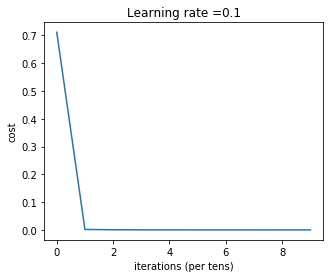

Accuracy: 0.75


In [97]:
### CONSTANTS ###
layers_dims = [train_x_2vec.shape[0], 20, 7, 5, 1] #  4-layer model
parameters = L_layer_model(train_x_2vec, train_y, layers_dims, num_iterations = 1000, print_cost = True)
pred_test = predict(test_x_2vec, test_y, parameters)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(train_x_2vec.T, train_y.T)
test_y_pred = clf.predict(test_x_2vec.T)
print(accuracy_score(test_y.T, test_y_pred.T))

0.78


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
print(train_x_2vec.shape, train_y.shape)
print(test_x_2vec.shape, test_y.shape)

(10000, 300) (1, 300)
(10000, 100) (1, 100)


In [126]:
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

MAX_SEQUENCE_LENGTH=100

def word_vec(x_data_tk, num_word, emb_dims):
    result = []
    for doc in x_data_tk:
        doc_2vec = []
        for i in range(0, num_word):
            if i < len(doc):
                doc_2vec.append(word_vectors[doc[i]])
            else:
                doc_2vec.append([0]*emb_dims)
        result.append(doc_2vec)
    return np.array(result)


emb_dim = len(word_vectors['chính_trị'])
train_x_vec = word_vec(train_x_tk, MAX_SEQUENCE_LENGTH, emb_dim).T
test_x_vec = word_vec(test_x_tk, MAX_SEQUENCE_LENGTH, emb_dim).T

from keras.utils import to_categorical
train_y_bin = to_categorical(train_y.T)
test_y_bin = to_categorical(test_y.T)

print(train_x_vec.T.shape, train_y_bin.shape)
print(test_x_vec.T.shape, test_y_bin.shape)


sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,emb_dim,), dtype='float64')
x = Conv1D(64, 3, activation='relu')(sequence_input)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(train_x_vec.T, train_y_bin,
          batch_size=300,
          epochs=50,
          validation_data=(test_x_vec.T, test_y_bin))

(300, 100, 100) (300, 2)
(100, 100, 100) (100, 2)
Train on 300 samples, validate on 100 samples
Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 1.1817 - acc: 0.5000 - val_loss: 1.6870 - val_acc: 0.5000
Epoch 2/50
300/300 [==============================] - 0s 592us/step - loss: 1.6993 - acc: 0.5000 - val_loss: 0.7003 - val_acc: 0.4800
Epoch 3/50
300/300 [==============================] - 0s 578us/step - loss: 0.6762 - acc: 0.5600 - val_loss: 0.6913 - val_acc: 0.5500
Epoch 4/50
300/300 [==============================] - 0s 614us/step - loss: 0.6344 - acc: 0.6533 - val_loss: 0.7112 - val_acc: 0.5100
Epoch 5/50
300/300 [==============================] - 0s 579us/step - loss: 0.6397 - acc: 0.5333 - val_loss: 0.7439 - val_acc: 0.5000
Epoch 6/50
300/300 [==============================] - 0s 648us/step - loss: 0.6559 - acc: 0.5067 - val_loss: 0.7260 - val_acc: 0.5000
Epoch 7/50
300/300 [==============================] - 0s 587us/step - loss: 0.6412 - acc: 0.5100 - val